# Classification of Images using - SIGN MNIST dataset

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, pixel1,pixel2….pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255. The original hand gesture image data represented multiple users repeating the gesture against different backgrounds. The Sign Language MNIST data came from greatly extending the small number (1704) of the color images included as not cropped around the hand region of interest. To create new data, an image pipeline was used based on ImageMagick and included cropping to hands-only, gray-scaling, resizing, and then creating at least 50+ variations to enlarge the quantity. The modification and expansion strategy was filters ('Mitchell', 'Robidoux', 'Catrom', 'Spline', 'Hermite'), along with 5% random pixelation, +/- 15% brightness/contrast, and finally 3 degrees rotation. Because of the tiny size of the images, these modifications effectively alter the resolution and class separation in interesting, controllable ways.

This dataset was inspired by the Fashion-MNIST 2 and the machine learning pipeline for gestures by Sreehari 4.

A robust visual recognition algorithm could provide not only new benchmarks that challenge modern machine learning methods such as Convolutional Neural Nets but also could pragmatically help the deaf and hard-of-hearing better communicate using computer vision applications. The National Institute on Deafness and other Communications Disorders (NIDCD) indicates that the 200-year-old American Sign Language is a complete, complex language (of which letter gestures are only part) but is the primary language for many deaf North Americans. ASL is the leading minority language in the U.S. after the "big four": Spanish, Italian, German, and French. One could implement computer vision in an inexpensive board computer like Raspberry Pi with OpenCV, and some Text-to-Speech to enabling improved and automated translation applications.

![American Sign Language](resources/amer_sign2.png)

## Library Imports

In [58]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(f"Using tensorflow version - {tf.__version__}")

Using tensorflow version - 2.9.1


## Load the dataset

In [59]:
# Get the datsets directory
DATASETS_DIR = os.environ.get("DATASET_DIR")

DATA_DIR = os.path.join(DATASETS_DIR, "sign_mnist", "sign_mnist_train.csv" )
sign_train = pd.read_csv(DATA_DIR)

# Check the data load
sign_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [60]:
# Load the test dataset
DATA_DIR = os.path.join(DATASETS_DIR, "sign_mnist", "sign_mnist_test.csv" )
sign_test = pd.read_csv(DATA_DIR)

# Check the data load
sign_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [61]:
# Examine the shape of the datasets

print(f"Shape of the training set - {sign_train.shape}")
print(f"Shape of the testing set - {sign_test.shape}")

Shape of the training set - (27455, 785)
Shape of the testing set - (7172, 785)


In [62]:
print(f"Number of unique labels - {len(sign_train['label'].unique())}")
sign_train['label'].unique()

Number of unique labels - 24


array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14], dtype=int64)

In [63]:
print(f"Number of unique labels - {len(sign_test['label'].unique())}")
sign_test['label'].unique()

Number of unique labels - 24


array([ 6,  5, 10,  0,  3, 21, 14,  7,  8, 12,  4, 22,  2, 15,  1, 13, 19,
       18, 23, 17, 20, 16, 11, 24], dtype=int64)

## Data Visualizations

In [64]:
# We will convert data frames to arrays
sign_train = sign_train.values
sign_test = sign_test.values

Label of the image is - 10


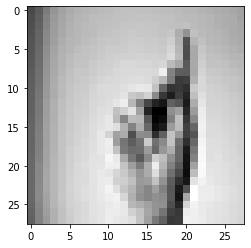

In [65]:
# Lets visualize a random image 
index = random.randint(1, sign_train.shape[0])
plt.imshow(sign_train[index, 1:].reshape(28, 28), cmap='gray')
print(f"Label of the image is - {sign_train[index, 0]}")


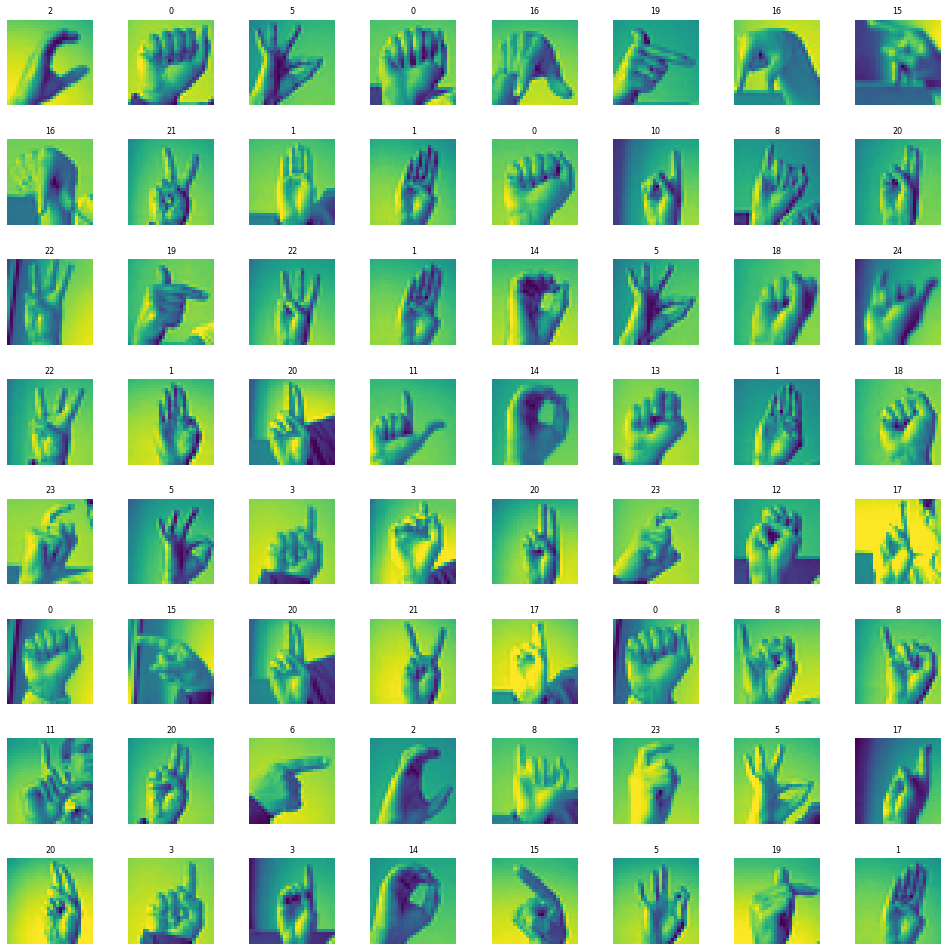

In [66]:
# Now we will view more images in a grid format - 10 X 10 images

# dimensions of the grid we want to view
W_grid = 8
L_grid = 8

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))

# flatten the 15 X 15 matrix into 225 array
axes = axes.ravel()

# Length of the training array
n_training = len(sign_train)

# In order to plot it sequentially (all 225 images)
for i in np.arange(0, W_grid * L_grid):
    
    # Select a random number
    index = random.randint(0, n_training)
    # Read and display an image with selected index
    axes[i].imshow(sign_train[index, 1:].reshape((28, 28)))
    axes[i].set_title(sign_train[index, 0], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

## Build and Train the CNN Model

In [67]:
# Extract the training and testing features and standardize the pixels
X_train = sign_train[:, 1:] /255
X_test = sign_test[:, 1:] / 255

# Extract the training and test target
y_train = sign_train[:, 0]
y_test = sign_test[:, 0]

print(f"Shape of training features - {X_train.shape}")
print(f"Shape of testing featires - {X_test.shape}")
print(f"Training target shape - {y_train.shape}")
print(f"Testing target shape - {y_test.shape}")

Shape of training features - (27455, 784)
Shape of testing featires - (7172, 784)
Training target shape - (27455,)
Testing target shape - (7172,)


In [68]:
# We will reshape the training and testing feature to be fed to the CNN
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

print(f"Shape of training features - {X_train.shape}")
print(f"Shape of testing featires - {X_test.shape}")
print(f"Training target shape - {y_train.shape}")
print(f"Testing target shape - {y_test.shape}")

Shape of training features - (27455, 28, 28, 1)
Shape of testing featires - (7172, 28, 28, 1)
Training target shape - (27455,)
Testing target shape - (7172,)


In [69]:
# Build the model

model = tf.keras.models.Sequential()

# First layer with first layer pooling
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.keras.activations.relu, input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(rate=0.2))

# Second layer with second layer pooling
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.keras.activations.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Dropout(rate=0.2))

# Flatten the output for input to ANN
model.add(tf.keras.layers.Flatten())

# ANN fully connected layer
model.add(tf.keras.layers.Dense(units=32, activation=tf.keras.activations.relu))
# Output layer
model.add(tf.keras.layers.Dense(units=25, activation=tf.keras.activations.softmax))

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

# Check the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 32)         

In [70]:
# Lets introduce a callback function
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=5, verbose=1, factor=0.5, min_lr=0.00001)

In [71]:
# Train the model
epochs_hist = model.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.2, callbacks=[learning_rate_reduction])

Epoch 1/100
43/43 [==============================] - 1s 12ms/step - loss: 3.1505 - accuracy: 0.0691 - val_loss: 2.9762 - val_accuracy: 0.1763 - lr: 0.0010
Epoch 2/100
43/43 [==============================] - 0s 9ms/step - loss: 2.6170 - accuracy: 0.2324 - val_loss: 2.0646 - val_accuracy: 0.4263 - lr: 0.0010
Epoch 3/100
43/43 [==============================] - 0s 9ms/step - loss: 1.8494 - accuracy: 0.4355 - val_loss: 1.4362 - val_accuracy: 0.5759 - lr: 0.0010
Epoch 4/100
43/43 [==============================] - 0s 9ms/step - loss: 1.3453 - accuracy: 0.5838 - val_loss: 1.0055 - val_accuracy: 0.7137 - lr: 0.0010
Epoch 5/100
43/43 [==============================] - 0s 10ms/step - loss: 1.0146 - accuracy: 0.6828 - val_loss: 0.7494 - val_accuracy: 0.7891 - lr: 0.0010
Epoch 6/100
43/43 [==============================] - 0s 9ms/step - loss: 0.7935 - accuracy: 0.7551 - val_loss: 0.5927 - val_accuracy: 0.8294 - lr: 0.0010
Epoch 7/100
43/43 [==============================] - 0s 10ms/step - loss: 

## Evaluate the Model

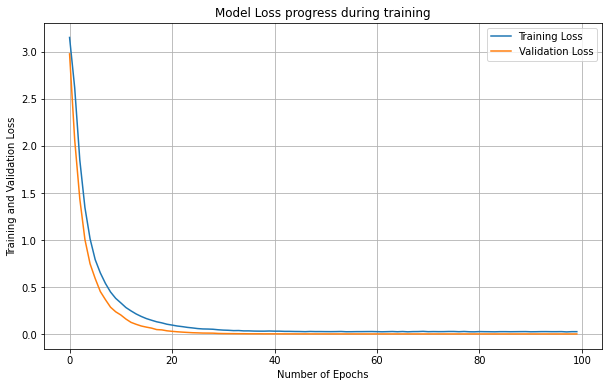

In [72]:
# Visualize the Model Loss
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title("Model Loss progress during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Loss")
plt.legend(['Training Loss', 'Validation Loss'])

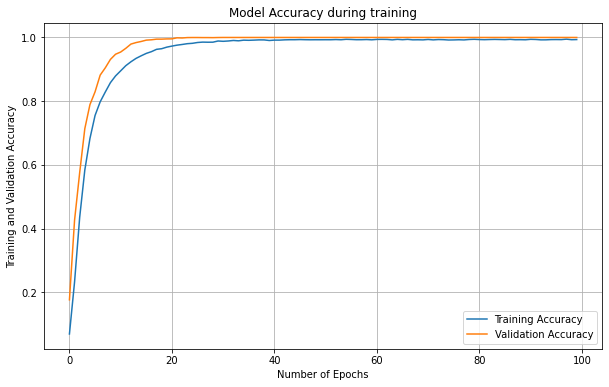

In [73]:
# Visualize the Model Accuracy
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['accuracy'])
plt.plot(epochs_hist.history['val_accuracy'])
plt.title("Model Accuracy during training")
plt.xlabel("Number of Epochs")
plt.ylabel("Training and Validation Accuracy")
plt.legend(['Training Accuracy', 'Validation Accuracy'])

In [74]:
# We will run predictions using this model and come up with the test accuracy
evaluations = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy is - {evaluations[1]}")

225/225 [==============================] - 1s 2ms/step - loss: 0.2228 - accuracy: 0.9391
Test Accuracy is - 0.939068615436554


In [75]:
# Now we will need to get predictions on the test data
predictions = model.predict(X_test)
prediction_classes = np.argmax(predictions, axis=1)

225/225 [==============================] - 0s 2ms/step


In [76]:
print('Confusion Matrix')
print(confusion_matrix(y_test, prediction_classes))
print("\n")
print("Accuracy Score")
print(accuracy_score(y_test, prediction_classes))
print("\n")
print("Classification Report")
print(classification_report(y_test, prediction_classes))

Confusion Matrix
[[331   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0 423   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   9   0   0]
 [  0   0 310   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 244   1   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 479   0   0   0   0   0   0   0   0   0   0   0   0  19
    0   0   0   0   0   0]
 [  0   0   0   0   0 247   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0 328   0   0   0   0   0   0   0   0  20   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0  20 416   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 266   0   0   0   0   0   0   1   0   0
    0   0   0   0   0  21]
 [  0   0   0   0   0   0   0   0   0 298   0   0   0   0   0   0  11   0
